## This is a light Analysis to Wine dataset
### In this notebook we are gonna take a look at the Wine dataset 'n like our previous fun with breast cancer analysis we want to do the same things but now with another dataset, for more exercise you can do much EDA we are not gonna get deep inside EDA .. for more info for EDA you can check my titanic classification

### ***And here we go.. Let's get into the data science dimension!!***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() # With this line we force all plots in seaborn style just for beatify :-)
%matplotlib inline

In [2]:
# Now let's import the dataset
dataset = pd.read_csv('Wine.csv')

In [3]:
# Let's take a look at our dataset
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Some light EDA

In [4]:
# Let's look at the dataset with more concentrate
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


### ***Ok as we see in above result all of the features is complete and we have no task for dealing with missing values HOOORRRAAA:-D***

In [5]:
# Let's look for our dependent variable
set(dataset['Customer_Segment'].values)

{1, 2, 3}

### ***we have three segment for Customer segment in another word; 3 class labels***

In [6]:
# Let's check for missing values in another way
dataset.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
Customer_Segment        False
dtype: bool

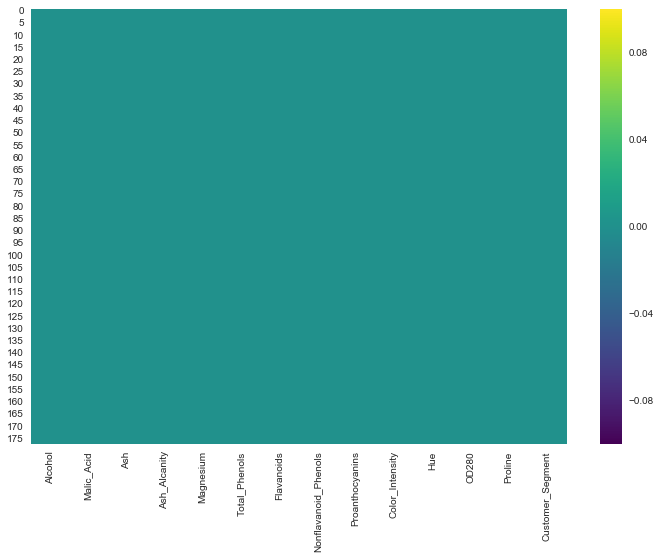

In [7]:
# now in fancy way!
plt.figure(figsize=(12,8))
sns.heatmap(dataset.isnull(), cmap='viridis')
plt.show()

### ***Ok..Satisfied?! it's clear like the Ocean***

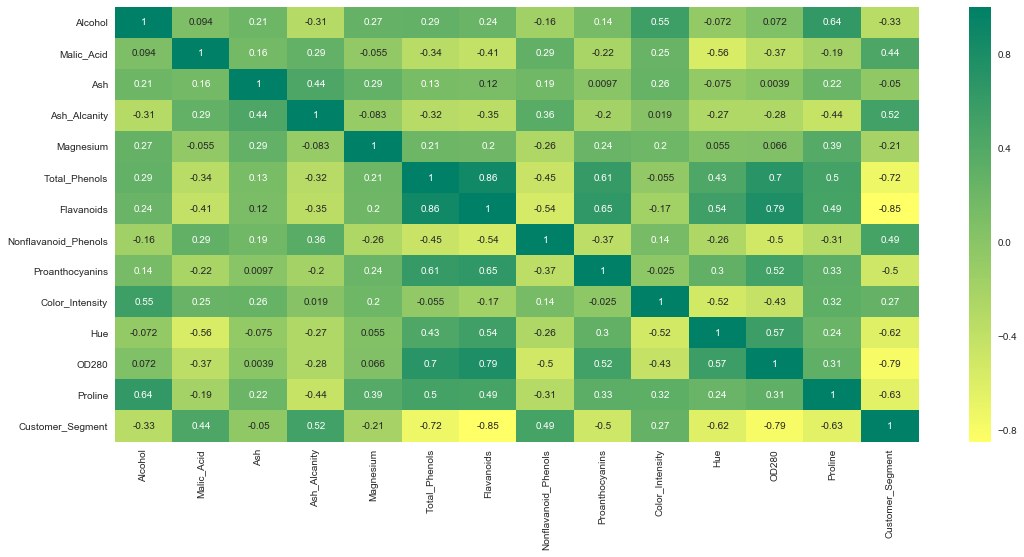

In [8]:
# Let's check for correlation between features
plt.figure(figsize=(18,8))
sns.heatmap(dataset.corr(), annot=True, cmap='summer_r')
plt.show()

### ***OK.. as we see Ash_Alcanity is most correlated to our dependent value which is Customer_Segment ***
### ***Another thing we can get from this heat map is there are a lot of multicolinearity between features that make us think about reducing the features because they can lead the model to have lower accuracy and high processing costs***

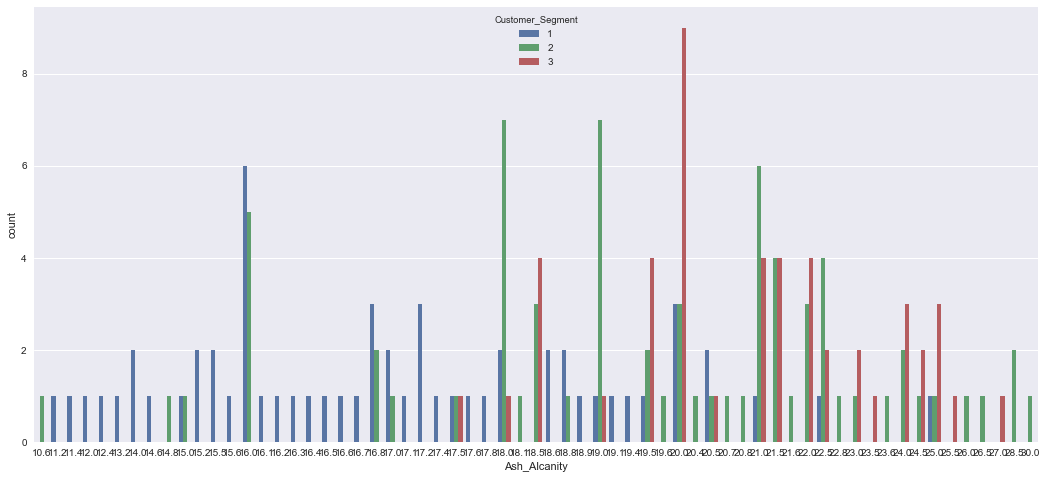

In [9]:
# Let's check the relation between Customer_Segment with Ash_Alcanity
# That's not really good way..well, just take a look and see how we can get
plt.figure(figsize=(18,8))
sns.countplot('Ash_Alcanity', hue='Customer_Segment', data=dataset)
plt.show()

### ***Hmmmm.. this plot have a lot of things to say.. spend little time to describe it, and do more EDA by yourself***
### ***For next steps we're gonna get into fun part: MODELING...So ready?? Let's CATWALK!!***

In [10]:
# First of all let's split our dataset to training and testing sets
# at first we should make our matrix of features and vector of y (dependent variable)
X = dataset.drop('Customer_Segment', axis=1) # We want all columns except Customer_segment
y = dataset['Customer_Segment'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
X_train.shape

(124, 13)

#### we have 124 sample data for training phase, as you guess we should have 54 sample for test set..let's check for sure

In [12]:
X_test.shape

(54, 13)

#### we were right as always we are!!!
#### :-|
#### Ok.. forget it...

### ***Now Let's make all of our features values in same scale.. YES you are right we are gonna do Feature Scaling***

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### ***Well done.. be ready to get going on the stage and do some modelling!***

In [14]:
from sklearn.svm import SVC
clf = SVC() # clf stands for classifier, we just made a object of SVC class
# Let's train it with our training set
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# Let's see what can our model do with testing set
pred = clf.predict(X_test)

## Evaluation
### ***Let's check the result of our model and evaluate it..***

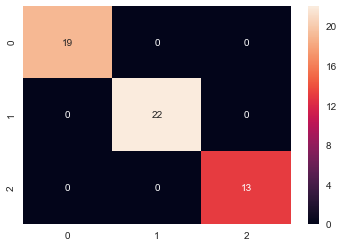

In [16]:
# now we evaluating with confusion matrix then we will check for classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.show()

In [17]:
print("Classification Report: \n\n", classification_report(y_test,pred))

Classification Report: 

              precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        22
          3       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        54



### ***Impressive we get 100% accuracy, but we have too many features that when are data getting bigger it leave us too much cost, let's reduce it***

In [18]:
# We are gonna use KernelPCA method for dimensionality reduction
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='rbf') # Just like the number 3!!
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [19]:
# Let's build model again with new train set
new_model = SVC()
new_model.fit(X_train_kpca,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# now the test phase
new_pred = new_model.predict(X_test_kpca)

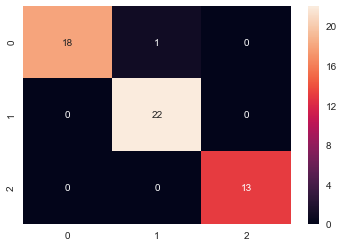

In [21]:
# Let's evaluate the new model
kpca_cm = confusion_matrix(y_test, new_pred)
sns.heatmap(kpca_cm, annot=True)
plt.show()

In [22]:
# Let's check for classification_report
print("Classification Report: \n\n", classification_report(y_test,new_pred))

Classification Report: 

              precision    recall  f1-score   support

          1       1.00      0.95      0.97        19
          2       0.96      1.00      0.98        22
          3       1.00      1.00      1.00        13

avg / total       0.98      0.98      0.98        54



### ***Well we loosing about 2% accuracy Ok but that's not tragic at least we reduce 10 FEATURES dudes!!***

### ***Well done.. hope you enjoyed this notebook.. feel free to use another methods like KNN or Naive bayes and other great classifiers do more EDA don't be lazy as i am .. seriously DON'T!!***

# FIN